In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
# Load the data
data_txt = open("january_14_2ft_.txt", 'r')
tides = []
days = []
for line in data_txt.readlines():
    cols = line.split()
    day = float(cols[0])
    tide = float(cols[2])
    days.append(day)
    tides.append(tide)

FileNotFoundError: [Errno 2] No such file or directory: 'january_14_2ft_.txt'

In [37]:
# Define the model function
def model_function(t, A, omega, phi, offset):
    return A * np.sin(omega * t + phi) + offset

In [38]:
# Fit the model to the data
p0 = [np.max(tides), 2*np.pi/365, 0, np.mean(tides)]
params, covariance = curve_fit(model_function, days, tides, p0=p0, sigma=0.25)

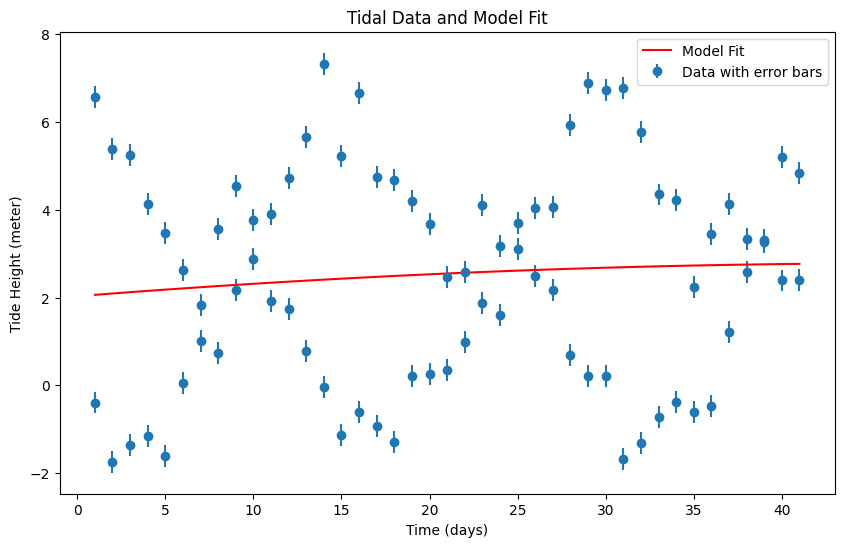

In [39]:
# Plot the data and model
plt.figure(figsize=(10, 6))
plt.errorbar(days, tides, yerr=0.25, fmt='o', label='Data with error bars')
plt.plot(days, model_function(np.array(days), *params), label='Model Fit', color='red')
plt.xlabel('Time (days)')
plt.ylabel('Tide Height (meter)')
plt.legend()
plt.title('Tidal Data and Model Fit')
plt.savefig('tidal_data_and_model_fit.pdf')
plt.show()

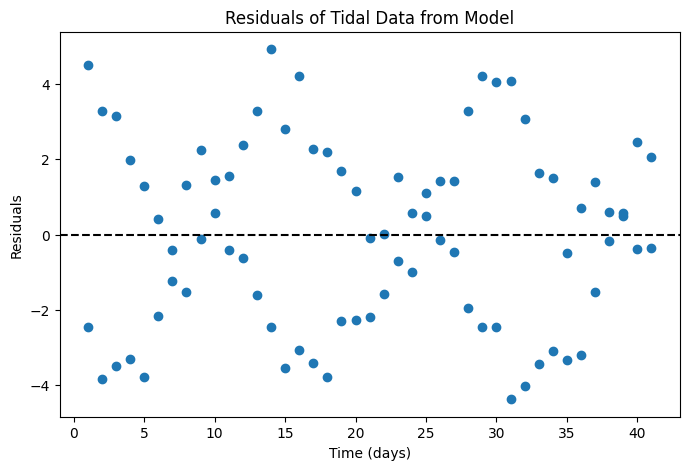

In [40]:
# Calculate and plot residuals
residuals = tides - model_function(np.array(days), *params)
plt.figure(figsize=(8, 5))
plt.plot(days, residuals, marker='o', linestyle='None')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Residuals')
plt.title('Residuals of Tidal Data from Model')
plt.savefig('tidal_residuals.pdf')
plt.show()

In [41]:
# Calculate standard deviation of residuals
std_dev_residuals = np.std(residuals)

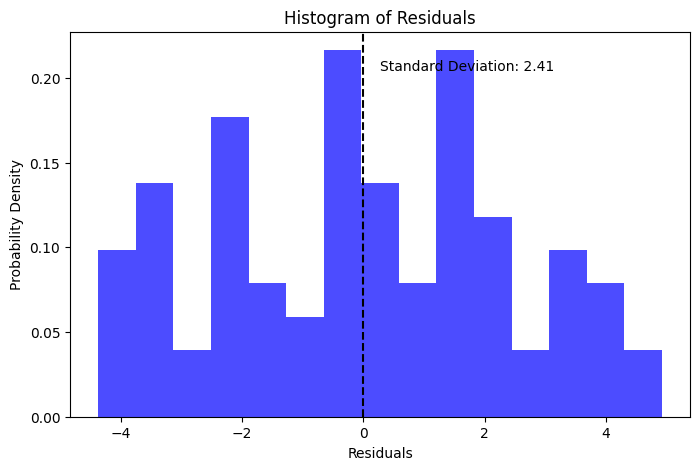

In [42]:
# Plot histogram of residuals
plt.figure(figsize=(8, 5))
count, bins, ignored = plt.hist(residuals, bins=15, density=True, alpha=0.7, color='blue', label='Residuals')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals')
plt.text(0.5, 0.9, f'Standard Deviation: {std_dev_residuals:.2f}', transform=plt.gca().transAxes)
plt.savefig('histogram_residuals.pdf')
plt.show()

In [43]:
# Calculate the deviation of the tsunami (2ft) in terms of standard deviations
tsunami_deviation = 2 / std_dev_residuals
print(f"Deviation of tsunami (2ft) from normal tides: {tsunami_deviation:.2f} standard deviations")

Deviation of tsunami (2ft) from normal tides: 0.83 standard deviations


In [44]:
# Add the outlier to the data and replot histogram
outlier = 2.0  # 2ft outlier
tides_with_outlier = tides + [outlier]

In [45]:
# Ensure tides_with_outlier has the same length as days
if len(tides_with_outlier) != len(days):
    tides_with_outlier = tides_with_outlier[:-1]

In [46]:
# Calculate new residuals
residuals_outlier = tides_with_outlier - model_function(np.array(days), *params)

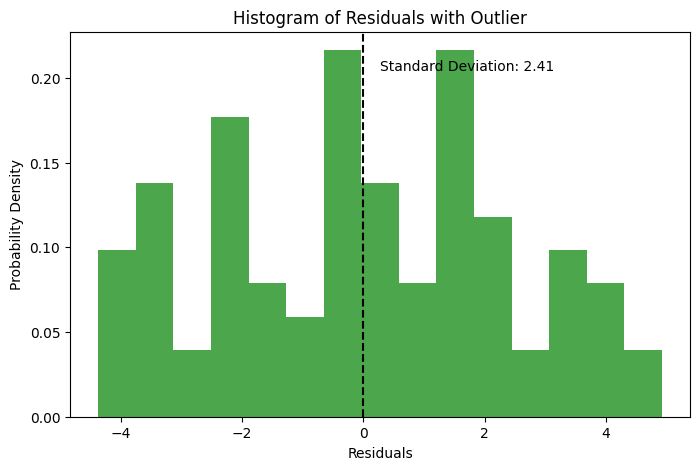

In [47]:
# Plot histogram with outlier
plt.figure(figsize=(8, 5))
count, bins, ignored = plt.hist(residuals_outlier, bins=15, density=True, alpha=0.7, color='green', label='Residuals with Outlier')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals with Outlier')
plt.text(0.5, 0.9, f'Standard Deviation: {std_dev_residuals:.2f}', transform=plt.gca().transAxes)
plt.savefig('histogram_residuals_with_outlier.pdf')
plt.show()